**Data Exploration and PreProcessing**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\SUVARCHALA\\Downloads\\Dataset .csv")

In [3]:
# 1. Explore the dataset and identify the number of rows and columns
num_rows, num_columns = df.shape
print(f'The dataset contains {num_rows} rows and {num_columns} columns.')

The dataset contains 9551 rows and 21 columns.


In [4]:
# 2. Check for missing values in each column and handle them accordingly
missing_values = df.isnull().sum()
print('\nMissing values in each column:\n', missing_values)


Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [6]:
# Handling missing values
# Here we'll decide to either drop or fill the missing values.
# For simplicity, let's fill numeric columns with their mean and categorical columns with their mode.

for column in df.columns:
    if df[column].dtype == np.number:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
        
# Verify if missing values are handled
missing_values_after = df.isnull().sum()
print('\nMissing values after handling:\n', missing_values_after)




Missing values after handling:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\SUVARCHALA\AppData\Local\Temp\ipykernel_11388\172435912.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SUVARCHALA\AppData\Local\Temp\ipykernel_11388\172435912.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SUVARCHALA\AppData\Local\Temp\ipykernel_11388\172435912.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\SUVARCHALA\AppData\Local\Temp\ipykernel_11388\172435912.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[

In [7]:
# 3. Perform data type conversion if necessary
# Checking data types
print('\nData types before conversion:\n', df.dtypes)

# If any column needs conversion, apply it here. For example, if a column is object type but contains numeric data:
# df['some_column'] = df['some_column'].astype(float)

# Re-checking data types
print('\nData types after conversion:\n', df.dtypes)



Data types before conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

Data types after conversion:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               flo

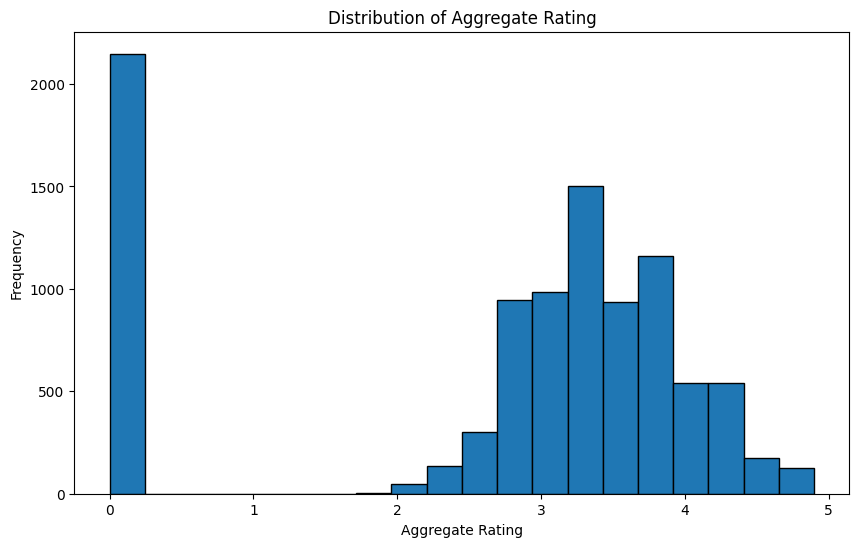

In [8]:
# 4. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances
# Assuming 'Aggregate rating' is the target variable

plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=20, edgecolor='k')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Checking for class imbalance
class_counts = df['Aggregate rating'].value_counts()
print('\nClass distribution of Aggregate Rating:\n', class_counts)


Class distribution of Aggregate Rating:
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64
